# Information Retrieval
## Assignment 3

Team members:

1: Pouria Sadr

2: Kimia Mahdinejad

3: Saleh Ebrahimian

4: Mobin Tasnimi

# **Read DataSet**

In [ ]:
import pandas as pd
from IPython.display import clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import time
clear_output()

Persian Content

In [ ]:
df_persian = pd.read_excel('/content/drive/MyDrive/IR-Dataset/DS-1/final_books.xlsx')

English Content

In [ ]:
df_english = pd.read_csv("/content/drive/MyDrive/IR-Dataset/DS-1/plot_summaries.txt", delimiter = "\t",names=["id","text"])

# **Prepare DataSet**

## **Persian**

### **Hazm**

In [ ]:
!pip install hazm
clear_output()

In [ ]:
import hazm

In [ ]:
def normalize_and_tokenize_hazm():
  # Normalize Data
  df_normalized_hazm = []

  normalizer = hazm.Normalizer()

  for row in df_persian['content']:
    if type(row) != str and pd.isna(row):
      row = ""
    df_normalized_hazm.append(normalizer.normalize(row))

  # Tokenize Data
  df_tokenized_hazm = []

  for row in df_normalized_hazm[0:50]:
    df_tokenized_hazm.append(hazm.word_tokenize(row))

  return df_tokenized_hazm

### **Parsivar**

In [ ]:
!pip install parsivar
clear_output()

In [ ]:
import parsivar

In [ ]:
def normalize_and_tokenize_parsivar():
  # Normalize Data

  df_normalized_parsivar = []

  normalizer = parsivar.Normalizer()

  for row in df_persian['content']:
    if type(row) != str and pd.isna(row):
      row = ""
    df_normalized_parsivar.append(normalizer.normalize(row))

  # Tokenize Data
  df_tokenized_parsivar = []

  tokenizer = parsivar.Tokenizer()

  for row in df_normalized_parsivar[0:50]:
    df_tokenized_parsivar.append(tokenizer.tokenize_words(row))

  return df_tokenized_parsivar

### **Dadmatools**

In [ ]:
!pip install dadmatools
clear_output()

In [ ]:
import dadmatools

In [ ]:
def normalize_and_tokenize_dadmatools():
  from dadmatools.models.normalizer import Normalizer
  import dadmatools.pipeline.language as language

  # Normalize Data
  df_normalized_dadmatools = []

  normalizer = Normalizer()

  for row in df_persian['content']:
    if type(row) != str and pd.isna(row):
      row = ""
    df_normalized_dadmatools.append(normalizer.normalize(row))

  # Tokenize Data
  df_tokenized_dadmatools = [[]]

  pips = 'tok'
  nlp = language.Pipeline(pips)
  clear_output()

  counter = 0

  for row in df_normalized_dadmatools[0:50]:
    if row != '':
      doc = nlp(row[0:len(row)-1])
      for token in doc:
        df_tokenized_dadmatools[counter].append(str(token))
    else:
      df_tokenized_dadmatools[counter].append("")
    counter += 1
    df_tokenized_dadmatools.append([])

  return df_tokenized_dadmatools

### **Comparison**

In [ ]:
start_time = time.time()
df_normalized_tokenized_hazm = normalize_and_tokenize_hazm()
print("Hazm - Execution Time: ", time.time() - start_time)
print("Hazm - Tokens Found: ", len(df_normalized_tokenized_hazm[0]))

Hazm - Execution Time:  1.3261427879333496
Hazm - Tokens Found:  128


In [ ]:
start_time = time.time()
df_normalized_tokenized_parsivar = normalize_and_tokenize_parsivar()
print("Parsivar - Execution Time: ", time.time() - start_time)
print("Parsivar - Tokens Found: ", len(df_normalized_tokenized_parsivar[0]))

Parsivar - Execution Time:  9.210834741592407
Parsivar - Tokens Found:  129


In [ ]:
start_time = time.time()
df_normalized_tokenized_dadmatools = normalize_and_tokenize_dadmatools()
print("Dadmatools - Execution Time: ", time.time() - start_time)
print("Dadmatools - Tokens Found: ", len(df_normalized_tokenized_dadmatools[0]))

Dadmatools - Execution Time:  69.41562008857727
Dadmatools - Tokens Found:  134


## **English**

### **NLTK**

In [ ]:
import nltk
import re

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
clear_output()

In [ ]:
def normalize_and_tokenize_nltk():
  # Normalize Data

  df_normalized_nltk = []

  for row in df_english['text']:
    if type(row) != str and pd.isna(row):
      row = ""
    df_normalized_nltk.append(re.sub(r'[^\w\s]','',row))

  # Tokenize Data
  df_tokenized_nltk = []

  for row in df_normalized_nltk[0:50]:
    df_tokenized_nltk.append(nltk.word_tokenize(row))

  return df_tokenized_nltk

### **Spacy**

In [ ]:
!pip install spacy
clear_output()

In [ ]:
import spacy

In [ ]:
def normalize_and_tokenize_spacy():
  # Normalize Data

  df_normalized_spacy = []

  for row in df_english['text']:
    if type(row) != str and pd.isna(row):
      row = ""
    df_normalized_spacy.append(re.sub(r'[^\w\s]','',row))

  # Tokenize Data
  df_tokenized_spacy = [[]]

  pips = 'tok'
  nlp = spacy.load('en_core_web_sm')
  clear_output()

  counter = 0

  for row in df_normalized_spacy[0:50]:
    if row != '':
      doc = nlp(row[0:len(row)-1])
      for token in doc:
        df_tokenized_spacy[counter].append(str(token))
    else:
      df_tokenized_spacy[counter].append("")
    counter += 1
    df_tokenized_spacy.append([])

  return df_tokenized_spacy

### **Comparison**

In [ ]:
start_time = time.time()
df_normalized_tokenized_nltk = normalize_and_tokenize_nltk()
print("NLTK - Execution Time: ", time.time() - start_time)
print("NLTK - Tokens Found: ", len(df_normalized_tokenized_nltk[0]))

NLTK - Execution Time:  2.397031307220459
NLTK - Tokens Found:  25


In [ ]:
start_time = time.time()
df_normalized_tokenized_spacy = normalize_and_tokenize_spacy()
print("SpaCy - Execution Time: ", time.time() - start_time)
print("SpaCy - Tokens Found: ", len(df_normalized_tokenized_spacy[0]))

SpaCy - Execution Time:  10.16029977798462
SpaCy - Tokens Found:  26


# **Stop Words**

In [ ]:
def filter_stop_words(language_type, df_normalized_and_tokenized):
  if language_type == "persian":
    stopwords = hazm.utils.stopwords_list()
    stopwords.append(".")
    stopwords.append("،")
  elif language_type == "english":
    stopwords = set(nltk.corpus.stopwords.words('english'))

  df_filtered = []

  for sentence in df_normalized_and_tokenized:
    filtered = [w for w in sentence if not w in stopwords]
    df_filtered.append(filtered)

  return df_filtered

## Results

In [ ]:
df_filtered_hazm = filter_stop_words("persian", df_normalized_tokenized_hazm)
print("Hazm - Before Filtering Stop Words", len(df_normalized_tokenized_hazm[0]))
print("Hazm - After Filtering Stop Words", len(df_filtered_hazm[0]))

Hazm - Before Filtering Stop Words 128
Hazm - After Filtering Stop Words 64


In [ ]:
df_filtered_parsivar = filter_stop_words("persian", df_normalized_tokenized_parsivar)
print("Parsivar - Before Filtering Stop Words", len(df_normalized_tokenized_parsivar[0]))
print("Parsivar - After Filtering Stop Words", len(df_filtered_parsivar[0]))

Parsivar - Before Filtering Stop Words 129
Parsivar - After Filtering Stop Words 69


In [ ]:
df_filtered_dadmatools = filter_stop_words("persian", df_normalized_tokenized_dadmatools)
print("DadmaTools - Before Filtering Stop Words", len(df_normalized_tokenized_dadmatools[0]))
print("DadmaTools - After Filtering Stop Words", len(df_filtered_dadmatools[0]))

DadmaTools - Before Filtering Stop Words 134
DadmaTools - After Filtering Stop Words 74


In [ ]:
df_filtered_nltk = filter_stop_words("english", df_normalized_tokenized_nltk)
print("NLTK - Before Filtering Stop Words", len(df_normalized_tokenized_nltk[0]))
print("NLTK - After Filtering Stop Words", len(df_filtered_nltk[0]))

NLTK - Before Filtering Stop Words 25
NLTK - After Filtering Stop Words 15


In [ ]:
df_filtered_spacy = filter_stop_words("english", df_normalized_tokenized_spacy)
print("SpaCy - Before Filtering Stop Words", len(df_normalized_tokenized_spacy[0]))
print("SpaCy - After Filtering Stop Words", len(df_filtered_spacy[0]))

SpaCy - Before Filtering Stop Words 26
SpaCy - After Filtering Stop Words 16


# **Word Cloud**

In [ ]:
!pip install wordcloud_fa
from wordcloud_fa import WordCloudFa
clear_output()

In [ ]:
from wordcloud import WordCloud

In [ ]:
def generate_word_cloud(language_type, df_filtered):
  array_to_string = ' '.join(str(item) for innerlist in df_filtered for item in innerlist)

  if language_type == "persian":
    wordcloud = WordCloudFa().generate(array_to_string)
  elif language_type == "english":
    wordcloud = WordCloud().generate(array_to_string)

  image = wordcloud.to_image()
  image.show()
  image.save('wordcloud.png')

## Results

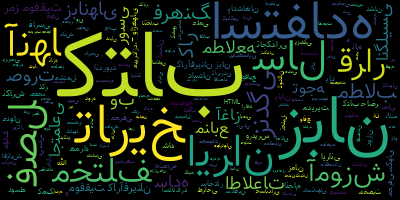

In [ ]:
# Hazm
generate_word_cloud("persian", df_filtered_hazm)

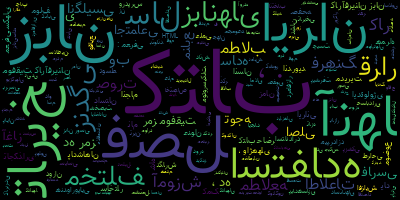

In [ ]:
# Parsivar
generate_word_cloud("persian", df_filtered_parsivar)

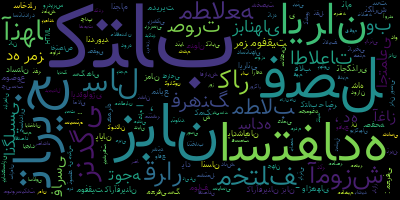

In [ ]:
# Dadmatools
generate_word_cloud("persian", df_filtered_dadmatools)

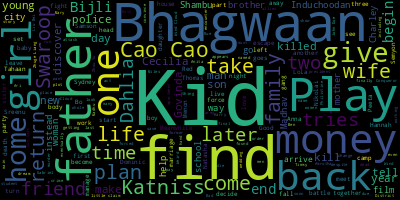

In [ ]:
# NLTK
generate_word_cloud("english", df_filtered_nltk)

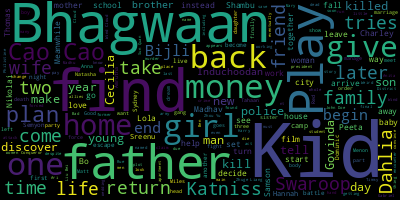

In [ ]:
# SpaCy
generate_word_cloud("english", df_filtered_spacy)

# **Stem Words**

In [ ]:
from parsivar import FindStems
from nltk.stem import PorterStemmer

In [ ]:
def stem_words(language_type, df_notmalized_and_tokenized):
  df_stem = []

  if language_type == "persian":
    my_stemmer = FindStems()

    for sent in df_notmalized_and_tokenized:
      result = []
      for w in sent:
        result.append(my_stemmer.convert_to_stem(w))
      df_stem.append(result)
  elif language_type == "english":
    nltk_stem = []
    ps = PorterStemmer()

    for sent in df_notmalized_and_tokenized:
      result = []
      for w in sent:
        result.append(ps.stem(w))
      df_stem.append(result)
  return df_stem

## Results

In [ ]:
df_stem_hazm = stem_words("persian", df_normalized_tokenized_hazm)
print("Hazm - Before Stemming: ", df_normalized_tokenized_hazm[0][0:10])
print("Hazm - After Stemming: ", df_stem_hazm[0:10])

Hazm - Before Stemming:  ['تی', 'دی', 'جیکس', 'یک', 'کشیش', '،', 'نویسنده', '،', 'سخنران', 'آمریکایی']
Hazm - After Stemming:  ['تی', 'دی', 'جیکس', 'یک', 'کشیش', '،', 'نویسنده', '،', 'سخنران', 'آمریکایی']


In [ ]:
df_stem_parsivar = stem_words("persian", df_normalized_tokenized_parsivar)
print("Parsivar - Before Stemming: ", df_normalized_tokenized_parsivar[0][0:10])
print("Parsivar - After Stemming: ", df_stem_parsivar[0:10])

Parsivar - Before Stemming:  ['تی', 'دی', 'جیکس', 'یک', 'کشیش', '،', 'نویسنده', '،', 'سخنران', 'آمریکایی']
Parsivar - After Stemming:  ['تی', 'دی', 'جیکس', 'یک', 'کشیش', '،', 'نویسنده', '،', 'سخنران', 'آمریکایی']


In [ ]:
df_stem_dadmatools = stem_words("persian", df_normalized_tokenized_dadmatools)
print("DadmaTools - Before Stemming: ", df_normalized_tokenized_dadmatools[0][0:10])
print("DadmaTools - After Stemming: ", df_stem_dadmatools[0:10])

DadmaTools - Before Stemming:  ['تی', 'دی', 'جیکس', 'یک', 'کشیش', '،', 'نویسنده', '،', 'سخنران', 'آمریکایی']
DadmaTools - After Stemming:  ['تی', 'دی', 'جیکس', 'یک', 'کشیش', '،', 'نویسنده', '،', 'سخنران', 'آمریکایی']


In [ ]:
df_stem_nltk = stem_words("english", df_normalized_tokenized_nltk)
print("NLTK - Before Stemming: ", df_normalized_tokenized_nltk[0][0:10])
print("NLTK - After Stemming: ", df_stem_nltk[0:10])

NLTK - Before Stemming:  ['Shlykov', 'a', 'hardworking', 'taxi', 'driver', 'and', 'Lyosha', 'a', 'saxophonist', 'develop']
NLTK - After Stemming:  ['shlykov', 'a', 'hardwork', 'taxi', 'driver', 'and', 'lyosha', 'a', 'saxophonist', 'develop']


In [ ]:
df_stem_spacy = stem_words("english", df_normalized_tokenized_spacy)
print("SpaCy - Before Stemming: ", df_normalized_tokenized_spacy[0][0:10])
print("SpaCy - After Stemming: ", df_stem_spacy[0:10])

SpaCy - Before Stemming:  ['Shlykov', 'a', 'hardworking', 'taxi', 'driver', 'and', 'Lyosha', 'a', 'saxophonist', 'develop']
SpaCy - After Stemming:  ['shlykov', 'a', 'hardwork', 'taxi', 'driver', 'and', 'lyosha', 'a', 'saxophonist', 'develop']


# **Posting List**

In [ ]:
df_filtered_hazm_stem = stem_words("persian" , df_filtered_hazm)
df_filtered_hazm_stem[0]

post_list = {}

for idx_sent, sent in enumerate(df_filtered_hazm_stem[:100]) :
  for idx_word, word in enumerate(sent) :
    if not post_list.get(word) :
      array = []
      array.append(idx_sent)
      post_list[word] = array
    else :
      post_list[word].append(idx_sent)

In [ ]:
sort_arrays = {}
for word in post_list.keys():
  temp = {i:post_list[word].count(i) for i in post_list[word]}
  temp = sorted(temp.items(), key=lambda x:x[1] , reverse = True)

  sort_arrays[word] = [x[0] for x in temp]

In [ ]:
sort_arrays["مختلف"]

[24, 0, 8, 19, 32, 45, 3, 11, 13]

## Result

In [ ]:
for word in sort_arrays.keys():
  print("dictionary Key: " + word + "\t\tPostings: ", sort_arrays[word])

dictionary Key: تی		Postings:  [0, 23]
dictionary Key: دی		Postings:  [0, 35]
dictionary Key: جیکس		Postings:  [0]
dictionary Key: کشیش		Postings:  [0]
dictionary Key: نویسنده		Postings:  [18, 0, 5, 9, 11, 13, 15, 16, 30, 46]
dictionary Key: سخنران		Postings:  [0]
dictionary Key: آمریکایی		Postings:  [0, 9, 32]
dictionary Key: سمینار		Postings:  [0]
dictionary Key: انگیزشی		Postings:  [0]
dictionary Key: مذهبی		Postings:  [0]
dictionary Key: دلیل		Postings:  [0, 14, 21]
dictionary Key: ایران		Postings:  [11, 43, 1, 14, 46, 0, 2, 5, 15, 37]
dictionary Key: سیاه		Postings:  [0]
dictionary Key: پوست		Postings:  [0]
dictionary Key: لقب		Postings:  [0, 11]
dictionary Key: زندگینامه		Postings:  [0]
dictionary Key: شاهد		Postings:  [0, 8]
dictionary Key: فعالیت		Postings:  [0, 29, 42]
dictionary Key: مختلف		Postings:  [24, 0, 8, 19, 32, 45, 3, 11, 13]
dictionary Key: خواهان		Postings:  [0, 10]
dictionary Key: تجربه		Postings:  [0, 29]
dictionary Key: تلاش		Postings:  [0, 15, 22]
dictionary Ke